*PARTE 2 - PROBLEMA DE CLASIFICACION LINEAL*

El Perceptrón simple es un clasificador lineal binario inspirado en redes neuronales.
Scikit-Learn incluye una implementación optimizada llamada Perceptron, que permite entrenarlo fácilmente sin programarlo desde cero.

El Perceptrón de sklearn permite ajustar:

max_iter: número máximo de épocas

eta0: tasa de aprendizaje

tol: tolerancia para detenerse si no mejora

random_state: reproducibilidad

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

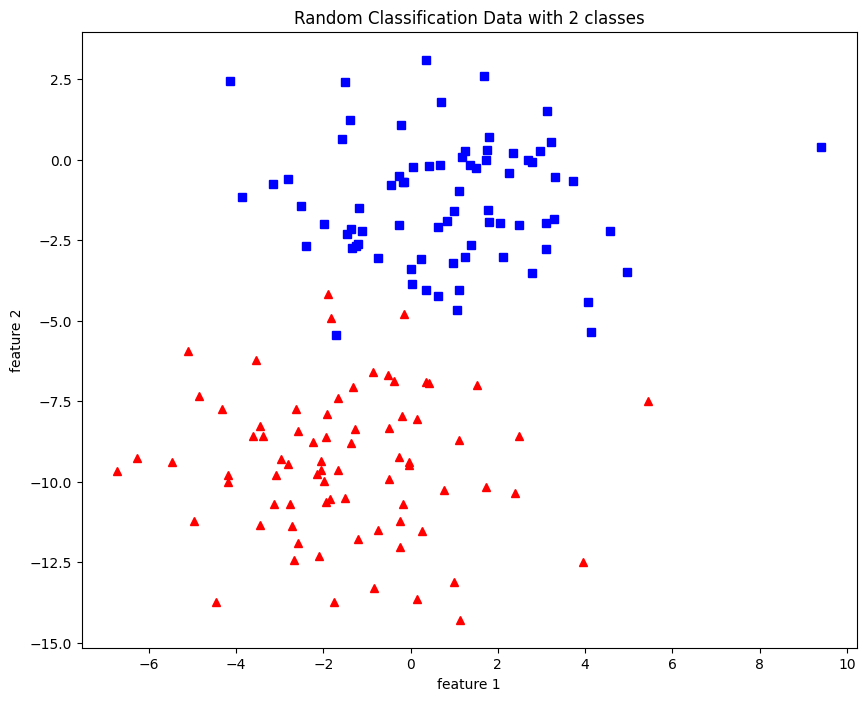

In [2]:
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=2.05,
                           random_state=2)

y[y==0]=-1
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


1. Implementación del Perceptron simple usando sklearn

In [4]:
perc = Perceptron(
    eta0=0.5,       # learning rate
    max_iter=1,     # 1 epoch por iteración
    shuffle=False,
    tol=None
)


2. Entrenar el modelo en ciclos y guardar: pesos, bias, costos, accuracy

In [5]:
import numpy as np

epochs = 500
costs = []
accuracies = []
weights = []
biases = []

perc.partial_fit(X, y, classes=np.array([-1, 1]))

for epoch in range(epochs):

    # Predicción
    y_pred = perc.predict(X)

    # Costo = número de muestras mal clasificadas
    cost = np.sum(y_pred != y)
    costs.append(cost)

    # Accuracy
    acc = perc.score(X, y)
    accuracies.append(acc)

    # Guardar pesos y bias
    weights.append(perc.coef_.copy())
    biases.append(perc.intercept_.copy())

    # Entrenar una epoch más
    perc.partial_fit(X, y)


3. Reportar los pesos W y el bias por epoch

In [6]:
print("Pesos finales:\n", weights[-1])
print("Bias final:\n", biases[-1])


Pesos finales:
 [[2.01264634 9.54038583]]
Bias final:
 [43.]


4. Graficar Costos vs Epochs + Conclusión

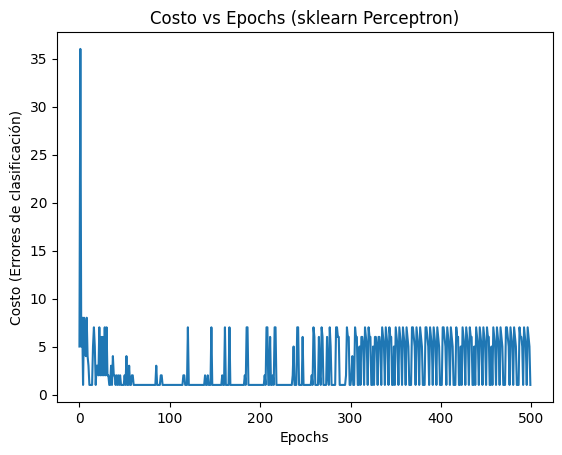

In [7]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("Costo (Errores de clasificación)")
plt.title("Costo vs Epochs (sklearn Perceptron)")
plt.show()


La gráfica muestra que el número de errores de clasificación disminuye rápidamente durante las primeras épocas, lo cual indica que el modelo está aprendiendo a separar las dos clases. Sin embargo, el costo no es estrictamente decreciente: presenta algunas oscilaciones y picos aislados incluso después de muchas épocas.

In [8]:
for i in range(5):
    print(f"Epoch {i}: W = {weights[i]}, b = {biases[i]}")

Epoch 0: W = [[2.06613188 1.69079266]], b = [8.5]
Epoch 1: W = [[-0.55821278  5.29270511]], b = [9.]
Epoch 2: W = [[0.16769407 2.80406899]], b = [11.5]
Epoch 3: W = [[1.63555188 3.61440991]], b = [12.5]
Epoch 4: W = [[1.07255014 3.22448255]], b = [14.]


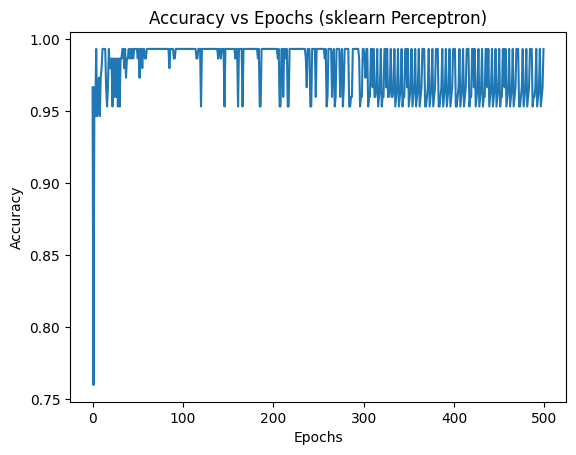

In [9]:
plt.plot(accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs (sklearn Perceptron)")
plt.show()


El accuracy aumenta a medida que el Perceptrón ajusta sus parámetros.

Cuando deja de mejorar, indica que ya encontró un hiperplano estable.

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = perc.predict(X)

print("Classification Report:")
print(classification_report(y, y_pred))

print("Matriz de Confusión:")
print(confusion_matrix(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

          -1       0.91      1.00      0.96        75
           1       1.00      0.91      0.95        75

    accuracy                           0.95       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.95      0.95       150

Matriz de Confusión:
[[75  0]
 [ 7 68]]


En clasificación las salidas son clases (discreto), no valores continuos.

Se evalúan aciertos exactos, no proximidad numérica.

Se mide sensibilidad, especificidad, etc., porque importan falsos positivos y falsos negativos.

En regresión, en cambio, se miden errores continuos (MSE, MAE, R²).

In [11]:
nuevo = np.array([[2.5, -1.3]])
pred = perc.predict(nuevo)

print("Clase predicha para el nuevo paciente:", pred)

Clase predicha para el nuevo paciente: [1]
